# Module 4: Model Development

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

### Setup
Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 1. Linear Regression and Multiple Linear Regression 

#### Linear Regression
One example of a Data Model that we will be using is

##### Simple Linear Regression. 
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.



##### 𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒  
##### 𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 

##### Linear function: 𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏𝑋
 
 

a refers to the intercept of the regression line0, in other words: the value of Y when X is 0  
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

### Lets load the modules for linear regression
 

In [3]:
from sklearn.linear_model import LinearRegression

### Create the linear regression object 

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### How could Highway-mpg help us predict car price?
 

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [5]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.

In [6]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### What is the value of the intercept (a)? 

In [8]:
lm.intercept_

38423.305858157386

#### What is the value of the Slope (b)? 

In [9]:
lm.coef_

array([-821.73337832])

### What is the final estimated linear model we get? 

As we saw above, we should get a final linear model with the structure:

𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
Plugging in the actual values we get:

price = 38423.31 - 821.73 x highway-mpg

#### Create a linear regression object? 

In [10]:
lm1 = LinearRegression()
lm1 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable? 

In [11]:
lm1.fit(df[['highway-mpg']], df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find the slope and intercept of the model? 

In [12]:
# Slope 
lm1.coef_

array([[-821.73337832]])

In [13]:
# Intercept
lm1.intercept_

array([38423.30585816])

#### What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'? 

In [14]:
# using X and Y  
Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*df['engine-size'].mean()

### Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer: 


𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 𝑋1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1  𝑋2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2  𝑋3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3  𝑋4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡  𝑏1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1 𝑏2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2 𝑏3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3 𝑏4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4

The equation is given by

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
 
From the previous section we know that other good predictors of price could be:

Horsepower  
Curb-weight  
Engine-size  
Highway-mpg  
Let's develop a model using these variables as the predictor variables.


In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [16]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

What is the value of the intercept(a)?

In [17]:
lm.intercept_

-15806.624626329227

What are the values of the coefficients (b1, b2, b3, b4)?

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
 
What is the linear function we get in this example?

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

#### Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'. 

In [19]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find the coefficient of the model? 

In [20]:
lm2.coef_

array([   1.49789586, -820.45434016])

## 2) Model Evaluation using Visualization 

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

In [21]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize Horsepower as potential predictor variable of price: 

(0, 48287.25955170051)

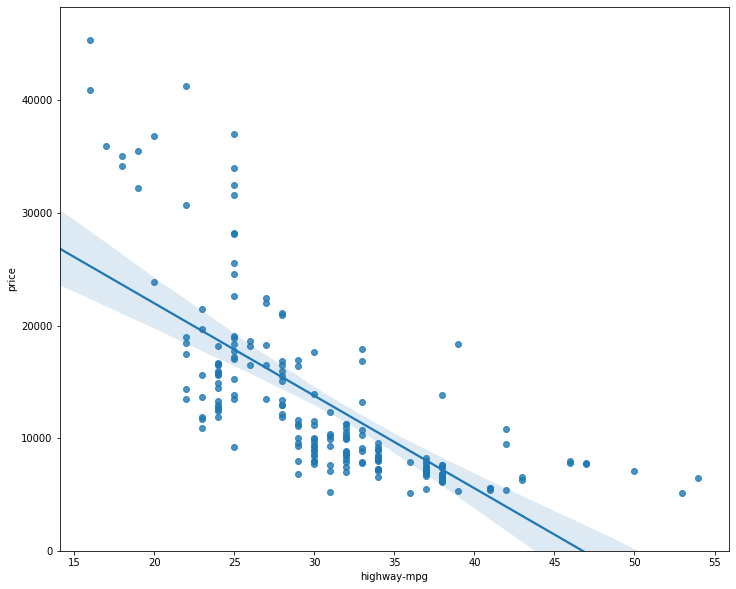

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

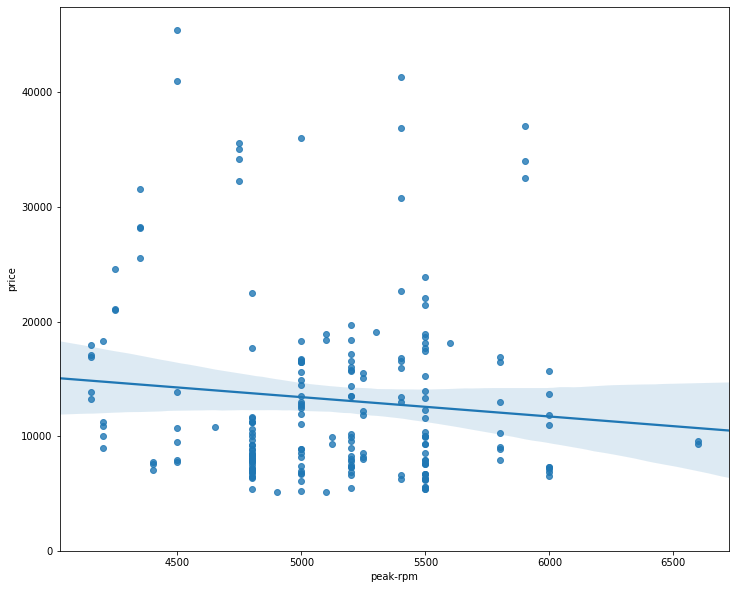

In [23]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

#### Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer. 

In [24]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data. 

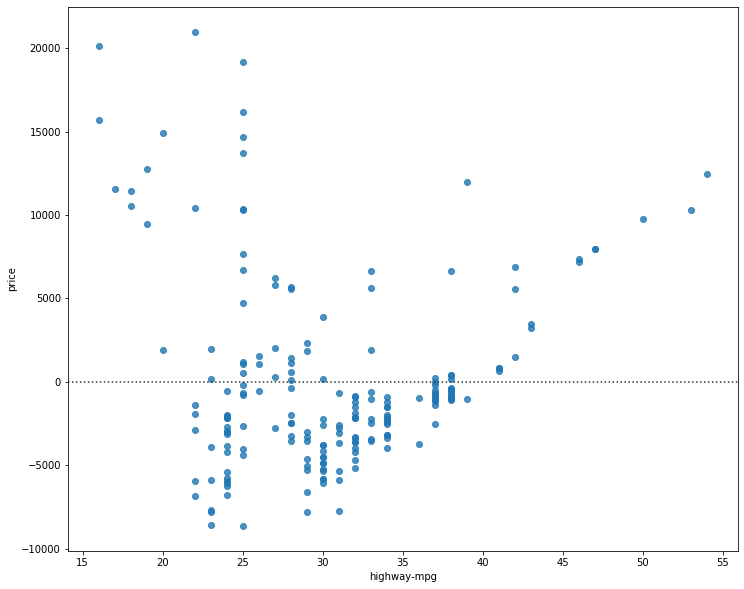

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction

In [26]:
Y_hat = lm.predict(Z)

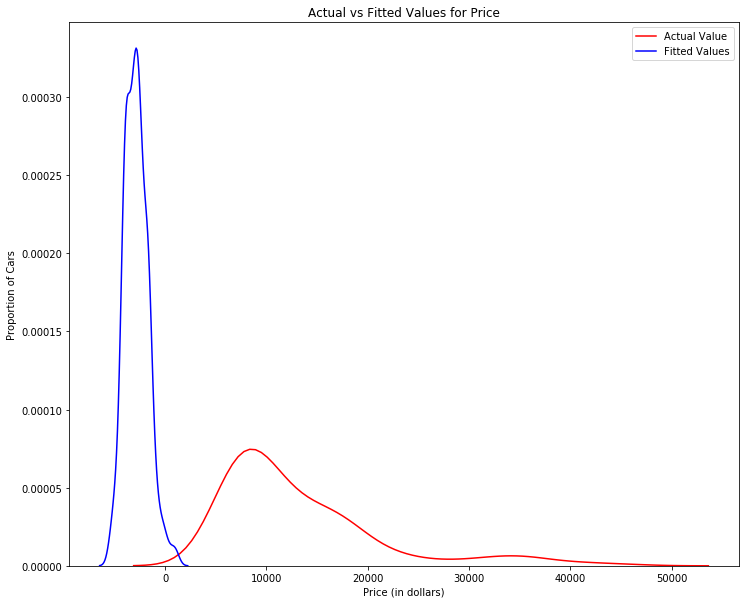

In [27]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Part 3: Polynomial Regression and Pipelines 

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2
 
Cubic - 3rd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3
Higher order:
𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3....
We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [28]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets get the variables

In [29]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [30]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

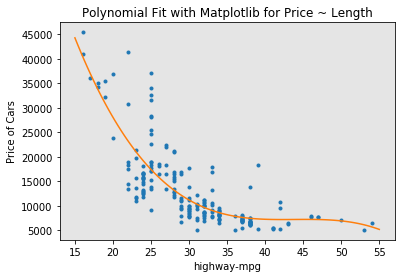

In [31]:
PlotPolly(p, x, y, 'highway-mpg')

In [32]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

#### Create 11 order polynomial model with the variables x and y from above? 

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


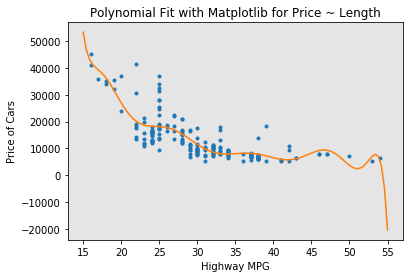

In [33]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

he analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

#### 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22
 
We can perform a polynomial transform on multiple features. First, we import the module:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [35]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [36]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features

In [37]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features

In [39]:
Z_pr.shape

(201, 15)

## Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline. 

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [41]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor

In [42]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can normalize the data, perform a transform and fit the model simultaneously.

In [43]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [44]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#### Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y 

In [45]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Part 4: Measures for In-Sample Evaluation¶
 

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

#### R^2 / R-squared
#### Mean Squared Error (MSE)

#### R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

#### Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

## Model 1: Simple Linear Regression
Let's calculate the R^2 

In [46]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [47]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


lets import the function mean_squared_error from the module metrics

In [48]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results

In [50]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


## Model 2: Multiple Linear Regression
Let's calculate the R^2 

In [51]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction

In [52]:
Y_predict_multifit = lm.predict(Z)

we compare the predicted results with the actual results

In [53]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726492


### Model 3: Polynomial Fit
Let's calculate the R^2

let’s import the function r2_score from the module metrics as we are using a different function 

In [54]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [55]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906515


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

### MSE
We can also calculate the MSE: 

In [56]:
mean_squared_error(df['price'], p(x))

20474146.426361237

## Part 5: Prediction and Decision Making 

### Prediction
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy. 

In [57]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [58]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model

In [59]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Produce a prediction

In [60]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

we can plot the data

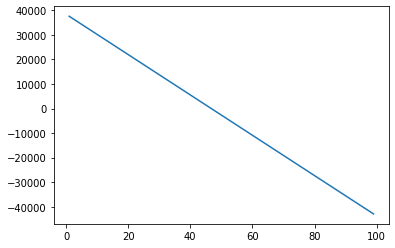

In [61]:
plt.plot(new_input, yhat)
plt.show()

## Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

##### What is a good R-squared value? 
When comparing models, the model with the higher R-squared value is a better fit for the data.

##### What is a good MSE? 
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price. 

R-squared: 0.49659118843391759 
MSE: 3.16 x10^7 
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497  
MSE: 1.2 x10^7  
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.  

R-squared: 0.6741946663906514  
MSE: 2.05 x 10^7 